In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_new=pd.read_csv('new_data_with_temp.csv')

In [10]:
df_new = df_new.drop('Unnamed: 0', 1)

In [11]:
df_new.head()

,Suburb,Website Category Names,Month,Count,AvgMinTemp,AvgMaxTemp,AvgDailyRainfall
0,Abba River,Non-Dwelling Burglary,3,1.0,16.1,30.695667,0.34
1,Abba River,Non-Dwelling Burglary,7,0.0,9.7,26.951612,0.19
2,Abba River,Non-Dwelling Burglary,11,0.0,23.7,39.006450,2.25
3,Abba River,Non-Dwelling Burglary,1,0.0,23.2,36.046715,2.36
4,Abba River,Non-Dwelling Burglary,0,0.0,24.7,39.706450,2.38


In [12]:
df_new = df_new.rename(columns={'Website Category Names': 'Crime_type'})

In [13]:
df_new[['Suburb']].describe()
df_new[['Crime_type']].describe()

,Crime_type
count,85392
unique,6
top,Stealing
freq,18216


In [14]:
df_new[['Count']].describe()

,Count
count,85392.000000
mean,19.382460
std,71.609151
min,0.000000
25%,0.000000
50%,1.000000
75%,9.000000
max,2920.000000


In [15]:
df_location=pd.read_csv('Suburb Location.csv')

In [16]:
df_location = df_location.drop('Unnamed: 0', 1)
df_location

,Subrub_Name,Latitude,Longitude
0,Lake Darlot,-23.992438,134.050443
1,North Boyanup,-33.434250,115.686252
2,Meelon,-32.700000,115.933330
3,Napier,-35.257030,146.774850
4,South Plantations,-24.850073,113.744603
...,...,...,...
1623,Denmark,-34.966170,117.357405
1624,Tanami,-20.145086,127.982051
1625,Caraban,-23.992438,134.050443
1626,Garden Island,-33.860655,151.228295


In [17]:
#location_dic = dict(zip(df_location.Subrub_Name, df_location.Latitude, df_location.Longitude))

location_dic = df_location.to_dict('records')
location_dic

[{'Subrub_Name': 'Lake Darlot',
  'Latitude': -23.992438,
  'Longitude': 134.050443},
 {'Subrub_Name': 'North Boyanup',
  'Latitude': -33.43425,
  'Longitude': 115.686252},
 {'Subrub_Name': 'Meelon', 'Latitude': -32.7, 'Longitude': 115.93333},
 {'Subrub_Name': 'Napier', 'Latitude': -35.25703, 'Longitude': 146.77485},
 {'Subrub_Name': 'South Plantations',
  'Latitude': -24.850073,
  'Longitude': 113.744603},
 {'Subrub_Name': 'South Lake',
  'Latitude': -23.992438,
  'Longitude': 134.050443},
 {'Subrub_Name': 'Orana', 'Latitude': -34.99601, 'Longitude': 117.85925},
 {'Subrub_Name': 'Yallabatharra',
  'Latitude': -28.207684,
  'Longitude': 114.306337},
 {'Subrub_Name': 'Carnarvon', 'Latitude': -24.885093, 'Longitude': 113.658465},
 {'Subrub_Name': 'Holmwood', 'Latitude': -29.03197, 'Longitude': 115.60415},
 {'Subrub_Name': 'Meadow', 'Latitude': -23.992438, 'Longitude': 134.050443},
 {'Subrub_Name': 'Nalyerlup', 'Latitude': -23.992438, 'Longitude': 134.050443},
 {'Subrub_Name': 'Gledhow', 

In [18]:
location_dic[0].keys()

dict_keys(['Subrub_Name', 'Latitude', 'Longitude'])

In [19]:
location_lat = []
location_lon = []
for i in list(df_new.Suburb.values):
    if i in list(df_location.Subrub_Name.values):
        for k in range(len(location_dic)):
            if i == location_dic[k]['Subrub_Name']:
                location_lat.append(location_dic[k]['Latitude'])
                location_lon.append(location_dic[k]['Longitude'])
    else:
        location_lat.append('Non')
        location_lon.append('Non')

In [20]:
df_new['Latitude'] = location_lat
df_new['Longitude'] = location_lon

In [21]:
df_new 

,Suburb,Crime_type,Month,Count,AvgMinTemp,AvgMaxTemp,AvgDailyRainfall,Latitude,Longitude
0,Abba River,Non-Dwelling Burglary,3,1.0,16.1,30.695667,0.34,-23.992438,134.050443
1,Abba River,Non-Dwelling Burglary,7,0.0,9.7,26.951612,0.19,-23.992438,134.050443
2,Abba River,Non-Dwelling Burglary,11,0.0,23.7,39.006450,2.25,-23.992438,134.050443
3,Abba River,Non-Dwelling Burglary,1,0.0,23.2,36.046715,2.36,-23.992438,134.050443
4,Abba River,Non-Dwelling Burglary,0,0.0,24.7,39.706450,2.38,-23.992438,134.050443
...,...,...,...,...,...,...,...,...,...
85387,Zanthus,Property Damage,2,1.0,17.4,30.203226,1.58,-31.035110,123.577490
85388,Zanthus,Property Damage,4,0.0,11.1,20.677420,0.67,-31.035110,123.577490
85389,Zanthus,Property Damage,10,0.0,15.2,30.746666,1.20,-31.035110,123.577490
85390,Zanthus,Property Damage,9,0.0,13.1,29.300259,0.99,-31.035110,123.577490


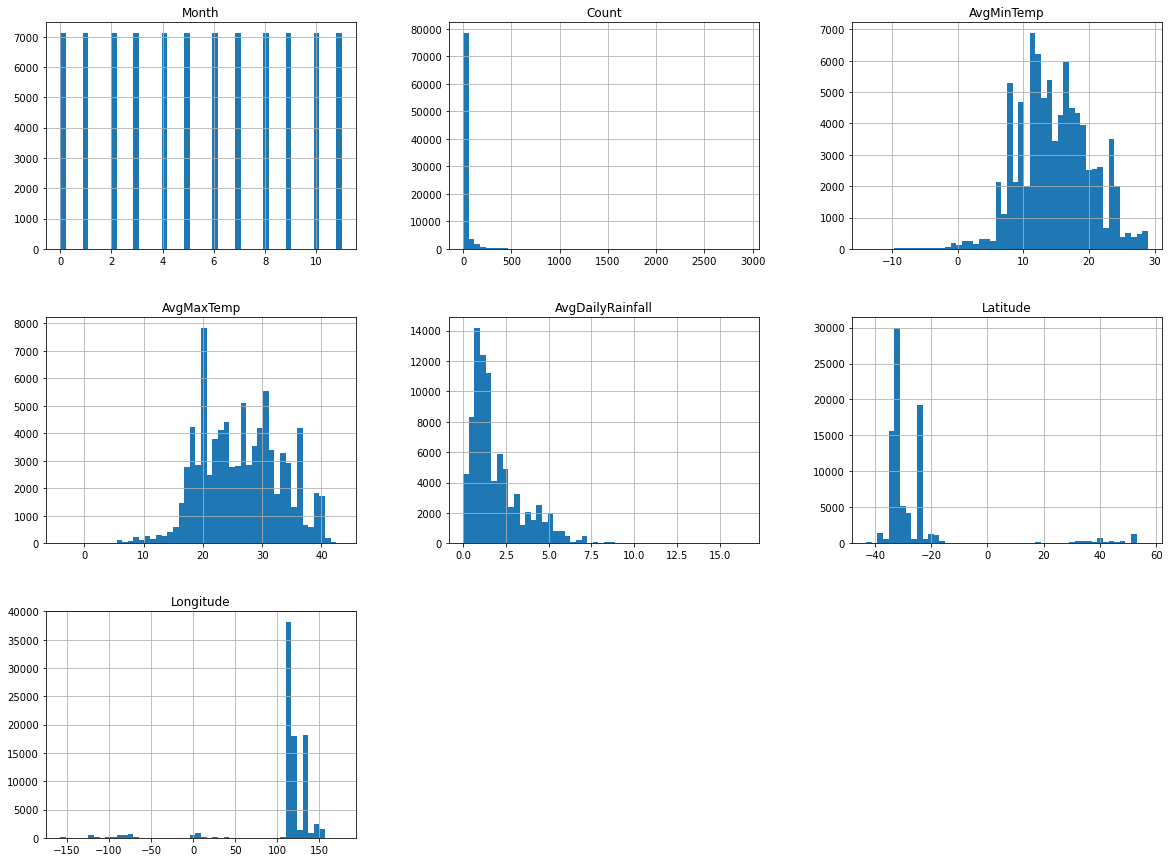

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
df_new.hist(bins=50,figsize=(20,15))  
plt.show()

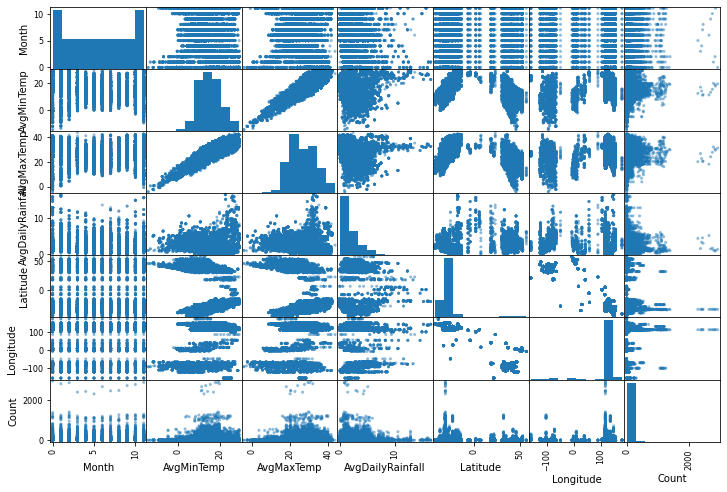

In [45]:
# exploring the relationship between each features 
from pandas.plotting import scatter_matrix
attributes = ["Month", "AvgMinTemp", "AvgMaxTemp", "AvgDailyRainfall","Latitude", "Longitude", "Count"]
scatter_matrix(df_new[attributes], figsize=(12, 8));

In [129]:
# the relation between count and other features 
corr_matrix = df_new.corr()
corr_matrix["Count"].sort_values(ascending=False)

Count               1.000000
AvgDailyRainfall    0.038819
AvgMinTemp          0.033874
Month              -0.000579
AvgMaxTemp         -0.010658
Latitude           -0.015449
Longitude          -0.016808
Name: Count, dtype: float64

In [101]:
set(list(df_new.Suburb.values))

{0.0, 1.0}

In [22]:
#df_Suburb = df_new[["Suburb"]] 
df_Website_Category_Names = df_new[["Crime_type"]]

In [23]:
# change categorical data into numerical
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
#df_suburb_1hot = cat_encoder.fit_transform(df_Suburb)
df_crime_1hot = cat_encoder.fit_transform(df_Website_Category_Names)
#df_suburb_1hot.toarray()
df_crime_1hot.toarray()


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [24]:
#df_new['Suburb'] = df_crime_1hot.toarray()
df_new['Crime_type'] = df_crime_1hot.toarray()

In [17]:
df_new[["Suburb", "Crime_type"]].describe()

,Crime_type
count,85392.000000
mean,0.116076
std,0.320318
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [89]:
df_new[['Count']].describe()

,Count
count,85392.000000
mean,19.382460
std,71.609151
min,0.000000
25%,0.000000
50%,1.000000
75%,9.000000
max,2920.000000


In [ ]:
# Is it necessary to scale the target value in addition to scaling features for regression analysis? no necessary

In [25]:
df_new=df_new.drop("Suburb", axis=1)

In [26]:
df_new

,Crime_type,Month,Count,AvgMinTemp,AvgMaxTemp,AvgDailyRainfall,Latitude,Longitude
0,0.0,3,1.0,16.1,30.695667,0.34,-23.992438,134.050443
1,0.0,7,0.0,9.7,26.951612,0.19,-23.992438,134.050443
2,0.0,11,0.0,23.7,39.006450,2.25,-23.992438,134.050443
3,0.0,1,0.0,23.2,36.046715,2.36,-23.992438,134.050443
4,0.0,0,0.0,24.7,39.706450,2.38,-23.992438,134.050443
...,...,...,...,...,...,...,...,...
85387,0.0,2,1.0,17.4,30.203226,1.58,-31.035110,123.577490
85388,0.0,4,0.0,11.1,20.677420,0.67,-31.035110,123.577490
85389,0.0,10,0.0,15.2,30.746666,1.20,-31.035110,123.577490
85390,0.0,9,0.0,13.1,29.300259,0.99,-31.035110,123.577490


In [27]:
# Split the data by 95/5
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size = 0.05, random_state = 0)

# unscaled data
X_train=train_set.drop("Count",axis=1).values
Y_train=train_set["Count"].values
X_test=test_set.drop("Count",axis=1).values
Y_test=test_set["Count"].values

In [22]:
from sklearn.model_selection import GridSearchCV

def predict(estimate,params,X,y):

  m = GridSearchCV(estimate,params,cv=3)
  m.fit(X,y)
  print(m.best_params_)
  bestM = m.best_estimator_
  return bestM.predict(X)


params1 = {'criterion': ['mse'], 'min_samples_leaf': list(range(1, 10)),'max_features':['auto', 'sqrt', 'log2'],'min_samples_split':list(range(2, 8))}


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


pred_raw = predict(DecisionTreeRegressor(random_state=100),params1,X_train,Y_train)

#pred_svr = predict(SVR(),params2,X_train_scaled,Y_train)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2}


In [146]:
from sklearn.metrics import mean_squared_error

print('decision tree training on  data', mean_squared_error(Y_train,pred_raw))

#print('svr training data', mean_squared_error(Y_train,pred_svr))

decision tree training on  data 3478.6097314609206


In [147]:
params2 = {'criterion': ['mse', 'friedman_mse', 'poisson', 'mae'], 'min_samples_leaf': [9], 'min_samples_split': [2], 'max_features':['auto']}

In [148]:
pred_raw = predict(DecisionTreeRegressor(random_state=100),params2,X_train,Y_train)

{'criterion': 'poisson', 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2}


In [149]:
print('decision tree test2 ', mean_squared_error(Y_train,pred_raw))

decision tree test2  3639.3938710663033


### Finding the best loss function using grid search 

In [29]:
from sklearn.model_selection import GridSearchCV

def predict(estimate,params,X,y):

  m = GridSearchCV(estimate,params,cv=3)
  m.fit(X,y)
  print(m.best_params_)
  bestM = m.best_estimator_
  return bestM.predict(X)

In [30]:
from sklearn.tree import DecisionTreeRegressor
params1 = {'criterion': ['mse', 'friedman_mse', 'poisson', 'mae']}

In [31]:
pred_raw = predict(DecisionTreeRegressor(random_state=100),params1,X_train,Y_train)

{'criterion': 'mae'}


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(Y_train,pred_raw)
mean_absolute_error(Y_train, pred_raw)

13.514903478711076

In [36]:
from sklearn.metrics import r2_score
r2_score(Y_train, pred_raw)

0.29205997419077856

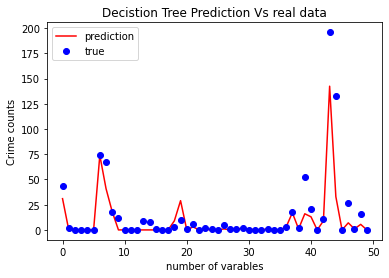

In [33]:
 
import numpy as np
import matplotlib.pyplot as plt
  

prediction = pred_raw[0:50]
  
true = Y_train[0:50]
  
# Function to plot  
plt.plot(prediction, 'r-', label ='prediction')
plt.plot(true, 'bo', label ='true')
  
# Function add a legend  
plt.legend()
plt.title('Decistion Tree Prediction Vs real data')
plt.xlabel('number of varables')
plt.ylabel('Crime counts')
  
# function to show the plot
plt.show()


### fit model and visualization

In [37]:
X = df_new.drop("Count",axis=1).values
Y =df_new["Count"].values

In [38]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(criterion = 'mae', max_depth=5, random_state=100)
regr = regr.fit(X_train, Y_train)

In [40]:
pred = regr.predict(X_test)

In [41]:
mean_absolute_error(Y_test, pred)

18.025526932084308

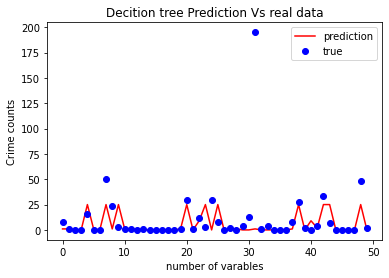

In [42]:
import numpy as np
import matplotlib.pyplot as plt
  

prediction = pred[100:150]
  
true = Y_test[100:150]
  
# Function to plot  
plt.plot(prediction, 'r-', label ='prediction')
plt.plot(true, 'bo', label ='true')
  
# Function add a legend  
plt.legend()
plt.title('Decition tree Prediction Vs real data')
plt.xlabel('number of varables')
plt.ylabel('Crime counts')
  
# function to show the plot
plt.show()



In [44]:
from sklearn import tree
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_6 <= 116.08
|   |--- feature_6 <= 115.70
|   |   |--- feature_5 <= 52.63
|   |   |   |--- feature_6 <= -122.14
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- value: [18.50]
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_6 >  -122.14
|   |   |   |   |--- feature_6 <= 115.59
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_6 >  115.59
|   |   |   |   |   |--- value: [3.00]
|   |   |--- feature_5 >  52.63
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_6 <= -4.39
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_6 >  -4.39
|   |   |   |   |   |--- value: [54.00]
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_5 <= 52.91
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- feature_5 >  52.91
|   |   |   |   |   |--- value: [5.00]
|   |--- feature_6 >  115.70
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_5 <= -32.56
|   |

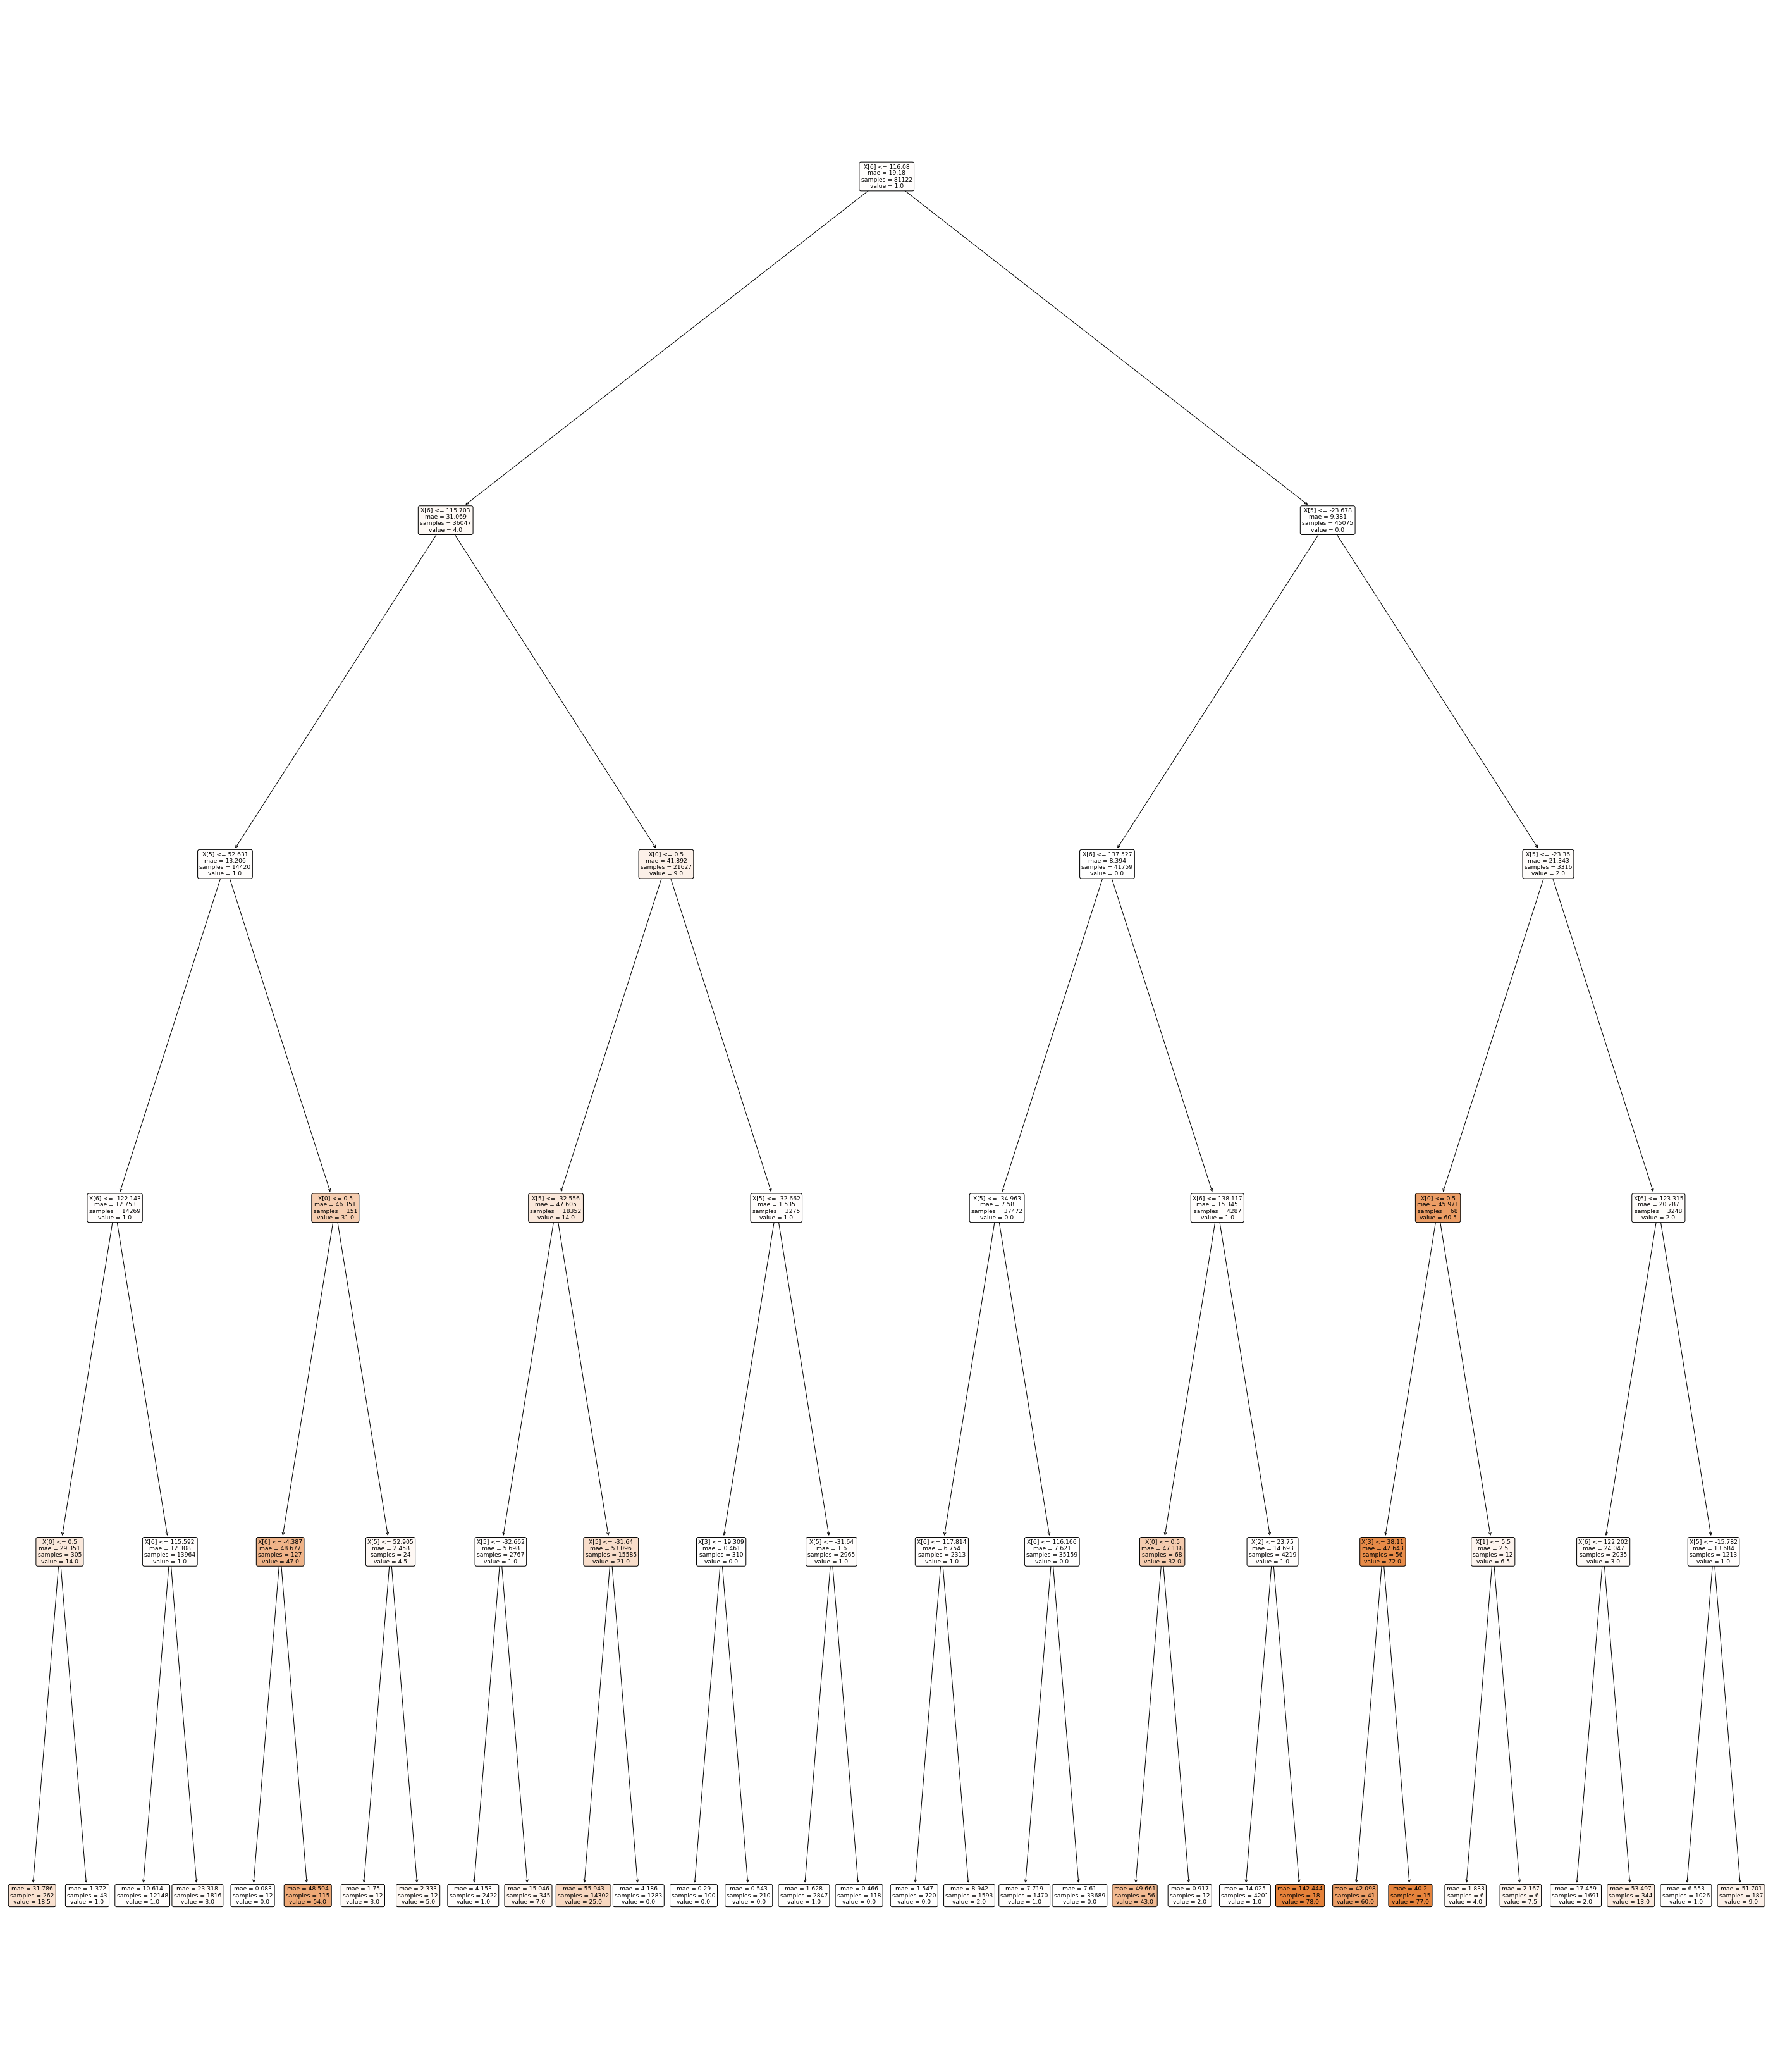

In [46]:
fig = plt.figure(figsize=(50,60))
_ = tree.plot_tree(regr, filled=True, rounded=True)
#tree.plot_tree(regr, filled=True)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  collections

In [69]:
df=pd.read_csv('Locality_crime.csv') 

In [70]:
df_weather = pd.read_csv('suburb_weather.csv',header=None)

In [71]:
# choose observations only with property crime 
options = ['Dwelling Burglary', 'Non-Dwelling Burglary', 'Stealing of Motor Vehicle', 'Stealing', 'Property Damage', 'Arson']
prop_df = df[df['Website Category Names'].isin(options)]

In [72]:
# remove Annual and Year columns 
df = prop_df.drop('Annual', 1)

In [73]:
df = df.drop("Year", 1)

In [74]:
# convert factor months to observation (row to column)
df2 = pd.melt(df, id_vars=["Suburb", "Website Category Names"], var_name="Month", value_name="Count")

In [75]:
# group data by sum  
df_group = df2.groupby(['Suburb', 'Website Category Names', 'Month']).sum()

In [77]:
df_group = df_group.reset_index()

In [78]:
c

,Suburb,Website Category Names,Month,Count
0,Abba River,Non-Dwelling Burglary,Apr,1.0
1,Abba River,Non-Dwelling Burglary,Aug,0.0
2,Abba River,Non-Dwelling Burglary,Dec,0.0
3,Abba River,Non-Dwelling Burglary,Feb,0.0
4,Abba River,Non-Dwelling Burglary,Jan,0.0
...,...,...,...,...
85387,Zanthus,Property Damage,Mar,1.0
85388,Zanthus,Property Damage,May,0.0
85389,Zanthus,Property Damage,Nov,0.0
85390,Zanthus,Property Damage,Oct,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_suburb_1hot = cat_encoder.fit_transform(df_Suburb)
df_crime_1hot = cat_encoder.fit_transform(df_Website_Category_Names)
df_suburb_1hot.toarray()
df_crime_1hot.toarray()